In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from emissions.trainer import Trainer
from emissions.data import load_data, clean_data
from sklearn.metrics import plot_confusion_matrix

In [3]:
# create a dictionary to store information on each model and use it at the end for summary
pollution_quantity = {}

In [4]:
# instantiate ImpSearch class
from emissions.impsearch import ImpSearch
imp = ImpSearch()
imp.load_data()

----------------start loading data----------------
Data loaded: 187503 records
----------------start cleaning data----------------

Records in input data: 187503

Share of Pass and Fail before cleaning:
Fail: 7%
Pass: 93%

Unique vehicles in Fail: 10813
Unique vehicles in Pass: 84908

Records with missing GVWR: 8125

Records after droping rows where GVWR is < 1000 or missing: 179373

Records after keeping only the earliest test within a month for each vehicle: 165732

Records where AFTER_COVID is True: 21325

Records where ODOMETER = 0: 796

Records after droping rows where ODOMETER is missing: 164855

Records after droping rows where MILE_YEAR > 40,000: 163891

Records in output data:163891

Share of Pass and Fail after cleaning:
Fail: 7%
Pass: 93%

Unique vehicles in Fail: 10194
Unique vehicles in Pass: 78573
['VEHICLE_TYPE' 'MODEL_YEAR' 'VEHICLE_AGE' 'MILE_YEAR' 'GVWR'
 'ENGINE_SIZE' 'TRANS_TYPE' 'TEST_TYPE' 'RESULT' 'MAKE'
 'ENGINE_WEIGHT_RATIO' 'SPORT' 'TEST_SDATE' 'AFTER_COVID']


# 2020 - Baseline model


In [5]:
imp.cols = ['VEHICLE_AGE', 'MILE_YEAR', 'MAKE']
imp.cols

['VEHICLE_AGE', 'MILE_YEAR', 'MAKE']


max_depth: 3
           train    val   test
accuracy   0.464  0.462  0.159
recall     0.727  0.734  0.975
precision  0.096  0.096  0.070

By the time 2020-11-14, 
                    - 1236 vehicles were off the road in reality
                    - 1334 vehicles could have been off the road using model max_depth = 3

By the time 2020-04-09, 
                    - 382 vehicles were off the road in reality
                    - 421 vehicles could have been off the road using model max_depth = 3

max_depth: 4
           train    val   test
accuracy   0.528  0.528  0.284
recall     0.701  0.702  0.861
precision  0.104  0.104  0.074

By the time 2020-09-24, 
                    - 1044 vehicles were off the road in reality
                    - 1178 vehicles could have been off the road using model max_depth = 4

By the time 2020-04-09, 
                    - 382 vehicles were off the road in reality
                    - 392 vehicles could have been off the road using model max_depth = 4


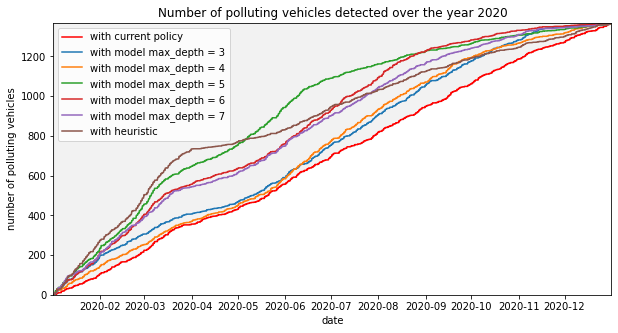

5             9280702
heuristic    10355663
6            10495798
7            10982799
3            12896066
4            13033048
dtype: int64

Saved implementation_analysis_2020_best_5.csv in data folder


In [6]:
imp.implement(2020, max_depth=np.arange(3, 8))

In [16]:
pollution_quantity['2020_baseline'] = [5, 9280702]

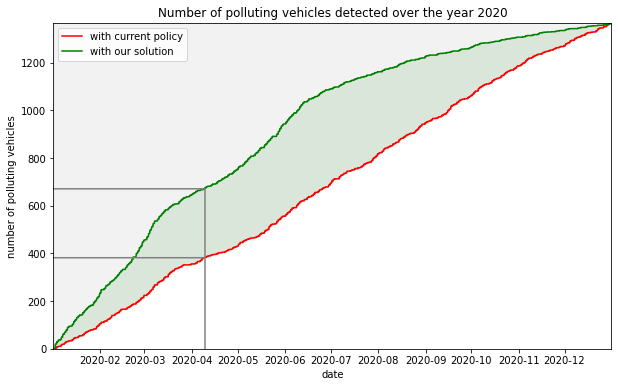

In [8]:
imp.plot_clean()

# 2020 - Decision Tree


In [9]:
imp.cols = ['VEHICLE_AGE', 'MILE_YEAR', 'MAKE', 'MODEL_YEAR', 'ENGINE_WEIGHT_RATIO']


max_depth: 3
           train    val   test
accuracy   0.573  0.561  0.761
recall     0.693  0.697  0.501
precision  0.110  0.109  0.137

By the time 2020-03-20, 
                    - 328 vehicles were off the road in reality
                    - 686 vehicles could have been off the road using model max_depth = 3

By the time 2020-04-09, 
                    - 382 vehicles were off the road in reality
                    - 707 vehicles could have been off the road using model max_depth = 3

max_depth: 4
           train    val   test
accuracy   0.558  0.575  0.764
recall     0.747  0.722  0.515
precision  0.114  0.117  0.141

By the time 2020-03-19, 
                    - 328 vehicles were off the road in reality
                    - 704 vehicles could have been off the road using model max_depth = 4

By the time 2020-04-09, 
                    - 382 vehicles were off the road in reality
                    - 765 vehicles could have been off the road using model max_depth = 4

max

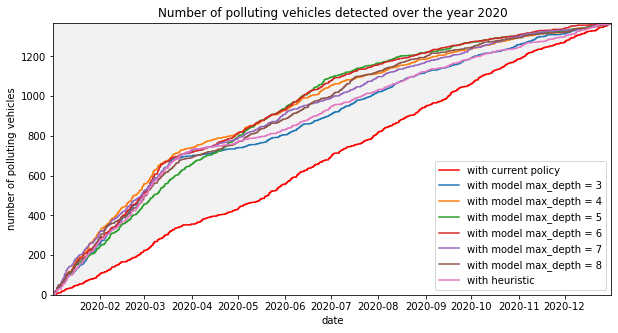

6             8913869
4             9084007
5             9211521
7             9473827
8             9498788
heuristic    10355663
3            10488530
dtype: int64

Saved implementation_analysis_2020_best_6.csv in data folder


In [10]:
imp.implement(2020, max_depth=np.arange(3, 9))

In [17]:
pollution_quantity['2020_DT'] = [6, 8913869]

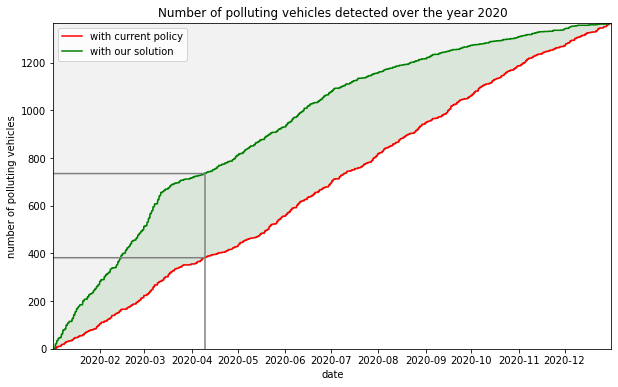

In [12]:
imp.plot_clean()

# 2020 - Random Forest



max_depth: 7
           train    val   test
accuracy   0.634  0.632  0.736
recall     0.748  0.730  0.577
precision  0.133  0.132  0.137

By the time 2020-04-10, 
                    - 387 vehicles were off the road in reality
                    - 790 vehicles could have been off the road using model max_depth = 7

By the time 2020-04-09, 
                    - 382 vehicles were off the road in reality
                    - 783 vehicles could have been off the road using model max_depth = 7

max_depth: 8
           train    val   test
accuracy   0.644  0.641  0.741
recall     0.748  0.725  0.577
precision  0.136  0.134  0.140

By the time 2020-04-07, 
                    - 379 vehicles were off the road in reality
                    - 789 vehicles could have been off the road using model max_depth = 8

By the time 2020-04-09, 
                    - 382 vehicles were off the road in reality
                    - 794 vehicles could have been off the road using model max_depth = 8

max

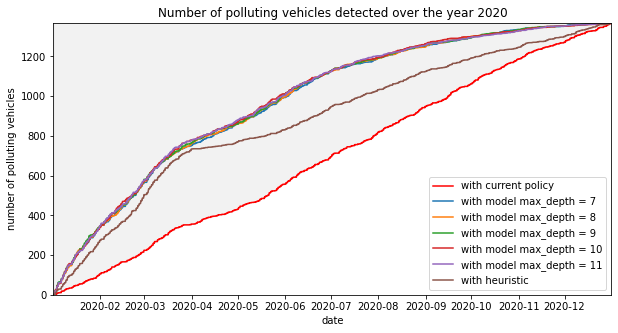

10            8011719
11            8036678
9             8071438
8             8124090
7             8162540
heuristic    10355663
dtype: int64

Saved implementation_analysis_2020_best_10.csv in data folder
CPU times: user 3min 52s, sys: 158 ms, total: 3min 52s
Wall time: 15min 50s


In [13]:
%%time
imp.implement(2020, n_estimators=[100], max_depth=np.arange(7, 12, 1))

In [18]:
pollution_quantity['2020_RF'] = [10, 8011719]

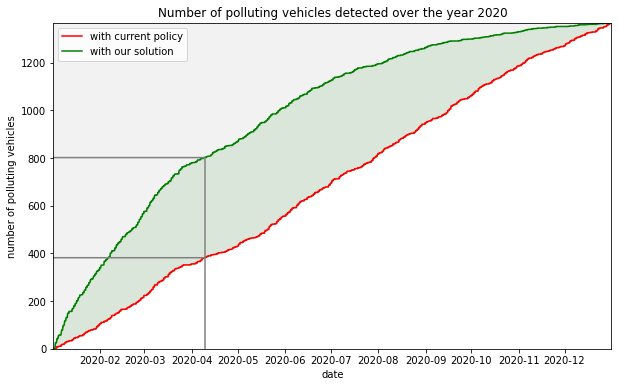

In [15]:
imp.plot_clean()

# Summary

In [19]:
# getting pollution quantity of current policy
t = pd.read_csv('../data/implementation_analysis_2020_best_7.csv').sort_values('TEST_SDATE')
t.set_index('TEST_SDATE', inplace=True)
t['n_fails_left'] = t.n_fails.max() - t.n_fails
pollution_quantity['current_policy'] = ['-', t.n_fails_left.sum()]

In [20]:
# summary table of models and corresponding reduced pollutions
tmp = pd.DataFrame.from_dict(pollution_quantity, orient='index')
tmp.columns = ['max_depth', 'pollution_quantity']
tmp['pollution_reduction'] = tmp.loc['current_policy', 'pollution_quantity'] - tmp.pollution_quantity
tmp.sort_values('pollution_reduction', ascending=False)

,max_depth,pollution_quantity,pollution_reduction
2020_RF,10,8011719,6350725
2020_DT,6,8913869,5448575
2020_baseline,5,9280702,5081742
current_policy,-,14362444,0


# 2020 - ExplainerDashboard - Decision Tree



In [25]:
# train test  
cols = imp.cols
X_train = imp.X_train
X_test = imp.X_test
y_train = imp.y_train
y_test = imp.y_test

In [17]:
from sklearn.ensemble import RandomForestClassifier
from emissions.transformer import MakeTransformer
from sklearn.preprocessing import OneHotEncoder
from explainerdashboard import ExplainerDashboard, ClassifierExplainer

In [18]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [22]:
# transform make
mt = MakeTransformer()
mt.fit(X_train[cols])
X_train_t = mt.transform(X_train[cols])
# encode make
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train_t[['MAKE']])

# form train df
df1 = X_train_t[['VEHICLE_AGE', 'MILE_YEAR', 'MODEL_YEAR', 'ENGINE_WEIGHT_RATIO']]
df2 = pd.DataFrame(enc.transform(X_train_t[['MAKE']]).toarray(), columns=enc.get_feature_names())
X_train_df = pd.concat([df1,df2], axis=1)

# form test df
X_test_t = mt.transform(X_test[cols])
f1 = X_test_t[['VEHICLE_AGE', 'MILE_YEAR', 'MODEL_YEAR', 'ENGINE_WEIGHT_RATIO']]
df2 = pd.DataFrame(enc.transform(X_test_t[['MAKE']]).toarray(), columns=enc.get_feature_names())
X_test_df = pd.concat([df1,df2], axis=1)

X_test_df.head()

,VEHICLE_AGE,MILE_YEAR,MODEL_YEAR,ENGINE_WEIGHT_RATIO,x0_acura,x0_bmw,x0_buick,x0_chevrolet,x0_chrysler,x0_dodge,...,x0_kia,x0_lexus,x0_mazda,x0_mitsubishi,x0_nissan,x0_other,x0_pontiac,x0_subaru,x0_toyota,x0_volkswagen
0,4,3637.25,2011,0.55,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13,12142.85,2002,0.64,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14,12862.07,2001,0.59,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,19,7041.84,1996,0.83,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,7,16336.71,2008,0.58,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# model
forest = RandomForestClassifier(n_estimators=1,
                                max_depth=7,
                                class_weight='balanced')

forest.fit(X_train_df, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=1)

In [25]:
%%time
explainer = ClassifierExplainer(forest, 
                                X_test_df, 
                                y_test,
                                target='RESULT',
                                labels=['PASS', 'FAIL']
                               )

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
CPU times: user 150 ms, sys: 30.1 ms, total: 180 ms
Wall time: 176 ms


In [28]:
explainer.dump("explainer_DT.joblib")

Calculating prediction probabilities...
Calculating prediction probabilities...
Calculating prediction probabilities...
Calculating prediction probabilities...Calculating prediction probabilities...

Calculating prediction probabilities...


In [27]:
db = ExplainerDashboard(explainer,
                           classifier_custom_component='precision_graph',
                           shap_interaction=False, 
                           mode='external')
db.run(port=8050)

Building ExplainerDashboard..
Generating layout...
Calculating shap values...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating roc auc curves...
Calculating prediction probabilities...
Calculating confusion matrices...
Calculating prediction probabilities...
Calculating prediction probabilities...
Calculating pred_percentiles...
Calculating prediction probabilities...
Calculating predictions...
Calculating prediction probabilities...
Calculating pr auc curves...
Calculating prediction probabilities...
Calculating liftcurve_dfs...
Calculating prediction probabilities...
Calculating prediction probabilities...
Calculating prediction probabilities...
Calculating prediction probabilities...
Calculating predictions...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. Classifie

In [30]:
# store both the explainer and the dashboard configuration:
db.to_yaml("dashboard_DT.yaml", explainerfile="explainer_DT.joblib", dump_explainer=True)

Dumping configuration .yaml to /home/guli/code/Guli-Y/DataScienceLab/wimlds_emissions/notebooks/dashboard_DT.yaml...
Dumping explainer to /home/guli/code/Guli-Y/DataScienceLab/wimlds_emissions/notebooks/explainer_DT.joblib...
